# HOMEWORK

This is Homework #2. My name is Yiqiao Yin and my UNI is yy2502. I approve this message. 

# PROBLEM 1 (HMM)

Suppose we have to model text data which is streamed from a news feed; each news item is part of a single topic. After random number of words, the new items ends and the next item begins. 

- There are $K$ topics. We have estimated the probability vector $\theta_1, ..., \theta_k$ (where $\theta_k$ is the parameter vector of a multinomial which models text with topic $k$)
- At any given word, the probability of remaining within the current topic is 0.99. 
- The probability of switching to a different topic is 0.01. For simplicity, assume all topics are equally likely. The probability to swtich to a specific new topic is $q:=\frac{0.01}{K-1}$ for each topic. 

## (a) Define a HMM

We define the HMM by defining the following:
- The state space is $k: k \in \{1, 2, ..., K\}$ and thus there are $Z_1, Z_2, ..., Z_k$.
- The sample space is $X_i: i \in \{1, 2, ..., n\}$ and thus there are $X_1, X_2, ..., X_n$
- The topics, $Z_1, Z_2, ..., Z_k$, are unobserved (hidden) variables; and the words, $X_1, X_2, ..., X_n$ are observed variables.
- Transition matrix, denoted by $q$, is defined as 
$q := \left\{\begin{array}{lcl}
0.99 && \text{ if } i = j \\ 
\frac{0.01}{K-1} && \text{ else, e.g. } i \neq j\\ 
\end{array}\right.$
- Emission matrix, denoted by $\mathbb{P}(X|Z)$ is defined as 
$\mathbb{P}(X = i|Z = k) = \theta_{ik}$
while $i$ is in $(1,2, ..., m)$ and $k$ is in $(1, 2, ..., K)$. Note: check multinomials

## (b) Stochastical Independence

Consider $\mathbb{P}(X|Z)$ and we have the following
\begin{align*}
\mathbb{P}(X_i|Z_k)
&= \frac{\mathbb{P}(X_i \cap Z_k)}{\mathbb{P}(Z_k)} \\
&= \frac{\mathbb{P}(X_i) \mathbb{P}(Z_k|A_i)}{\sum_{i=1}^K \mathbb{P}(X_i) \mathbb{P}(Z_k|X_i)} \\
\end{align*}
which is a function of $\mathbb{P}(X_{i-2})$ and this shows that $\mathbb{P}(X_i|Z_k) \neq \mathbb{P}(X_i) \mathbb{P}(Z_k)$. Thus, there is dependence relationship.

# PROBLEM 2 (GIBBS SAMPLING)

For a set $x_1, ..., x_d$, we write $x_{-i}$ for the set with $i$th element removed. 
$x_{-i} = \{x_1, ..., x_{i-1}, x_{i+1}, ..., x_d\}$
and we proceed with the following questions.

## (a) Derive full conditional $p(x_i|x_{-i})$

Define data $x_n \sim \text{Multinomials}(\pi)$ and $z_n|x_n, \mu_{1:K} \sim N(\mu, \sigma^2)$. Then we have
\begin{align*}
p(x_i|x_{-i}, z) 
&\propto \int_{\mu} p(x_i, \mu_{1:K}|x_{-i}, x) \\
&= \int_{\mu} p(x_i|\mu_{1:K}, x_{-i}, x) p(\mu_{1:K}|x_{-i}, x) \\
&= p(x_i) \int_{\mu} p(z_i|\mu_{x_i}) p(\mu_{x_i}|z_{m: x_m = z_i}) \\
\end{align*}
and we are done. 

## (b) Derive full conditional $\mathbb{P}(X_i = \cdot | X_{-i})$

We have the following

$P(\cdot|X_{-i}) := \left\{\begin{array}{lcl}
\sigma(\theta_i X_{i-1}) && \text{ if } X_{-i} = 1 \\
1 - \sigma(\theta_i X_{i-1}) && \text{ if } X_{-i} = 0 \\
\end{array}\right.$

and let us write out the sigmoid function

$P(\cdot|X_{-i}) := \left\{\begin{array}{lcl}
\frac{1}{1 + \exp(-\theta_i X_{i-1})} && \text{ if } X_{-i} = 1 \\
1 - \frac{1}{1 + \exp(-\theta_i X_{i-1})} = \frac{\exp(-\theta_i X_{i-1})}{1 + \exp(-\theta_i X_{i-1})} && \text{ if } X_{-i} = 0 \\
\end{array}\right.$

# PROBLEM 3 (IMPLEMENTATION)

Based on the understanding of Problem 2, we implement the idea here in the following.

## (a) Implement Gibbs Sampler

Implement Gibbs Sampler for the $d$-dimensional Gaussian. Sample a bunch of points using Gibbs sampling and compare them to points sampled from the true distribution. In this section, I’ll define the true joint distribution. This problem I used framework from [Jessica Stringham](http://jessicastringham.net/2018/05/09/gibbs-sampling.html). However, the premise I use the one provided from our problem. For (c), we need to code our own function, sigmoid function, instead of using Gaussian. 

In [0]:
# Import packages 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal as mvn


In [0]:
# Work with 2 dimensions
D = 2

# set up the means
a_mu = 1
b_mu = 1

a_sigma = 1
b_sigma = 5
a_b_cov = 1

joint_cov = np.vstack(((a_sigma, a_b_cov), (a_b_cov, b_sigma)))
joint_mu = np.vstack((a_mu, b_mu))

In [0]:
# Use the Cholesky decomposition of the covariance matrix
#N = 10000

#L = np.linalg.cholesky(joint_cov)
#samples_from_true_distribution =  np.matmul(L, np.random.randn(D, N)) + joint_mu

# This code is to check the true distribution
# We will hide this since this is for my own education only.


In [0]:
def get_conditional_dist(joint_mu, joint_cov, var_index):
    '''Returns the conditional distribution given the joint distribution and which variable
    the conditional probability should use.
    Right now this only works for 2-variable joint distributions.
    
      joint_mu: joint distribution's mu
      joint_cov: joint distribution's covariance
      var_index: index of the variable in the joint distribution. Everything else will be 
        conditioned on. For example, if the joint distribution p(a, b, c) has mu [mu_a, mu_b, mu_c],
        to get p(c | a, b), use var_index = 2.
      
    returns:
      a function that can sample from the univariate conditional distribution
    '''
    assert joint_mu.shape[0] == 2, 'Only works for 2-dimensional joint distributions right now'
    a = joint_mu[var_index]
    b = joint_mu[~var_index]
    
    A = joint_cov[var_index, var_index]
    B = joint_cov[~var_index, ~var_index]
    C = joint_cov[var_index, ~var_index]
    
    # we're dealing with one dimension so
    B_inv = 1/B
    
    # Return a function that can sample given a value of g
    def dist(g):
        # a + C*B^{-1}(g - b)
        mu = a + C * B_inv * (g - b)
        # A - C * B^{-1} * C^T
        cov = A - B_inv * C * C
        return np.sqrt(cov) * np.random.randn(1) + mu
    
    return dist

In [0]:
# Set up the conditional probability distribution for each dimension

univariate_conditionals = [
    get_conditional_dist(joint_mu, joint_cov, d)
    for d in range(D)
]

In [0]:
# Implement the Gibbs sampling algorithm
def gibbs_sample(univariate_conditionals, sample_count):
    '''Does Gibbs sampling given the distribution's univariate conditionals.
    
    Returns a D x N matrix
    '''
    D = len(univariate_conditionals)
    assert D == 2, "Sorry, this only supports 2 dimensions right now"
    
    # initializes an empty matrix for the samples
    samples = np.zeros((D, sample_count))

    # initialize the first sample to some arbitrary value
    samples[:, 0] = [3, -3]
    
    for i in range(1, sample_count):
        # first set this sample equal to the previous sample
        samples[:, i] = samples[:, i - 1]
        
        # now update the dimension whose turn it is using the conditional distribution
        # pass in all dimension from the previous sample except this dimension
        d = i % D
        samples[d, i] = univariate_conditionals[d](samples[~d, i - 1])
                 
    return samples


## (b) Run $d=2$ 

Run sampler for $d = 2$ on a Gaussian with mean vector and covariance matrix
$
\mu = 
\begin{pmatrix}
1 \\
1 \\
\end{pmatrix}
, \text{ and }
\Sigma = 
\begin{pmatrix}
1 & 1 \\
1 & 5 \\
\end{pmatrix}
$ and visualize the results. Plot the contour lines of Gaussian (for one standard deviation) against, say, 1000 samples of the Gibbs sampler.

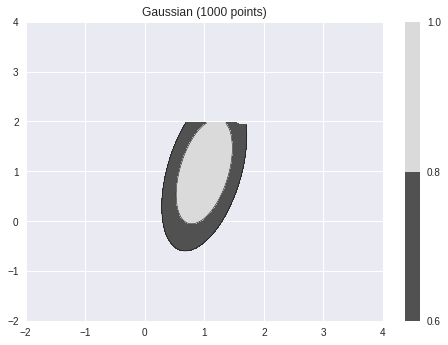

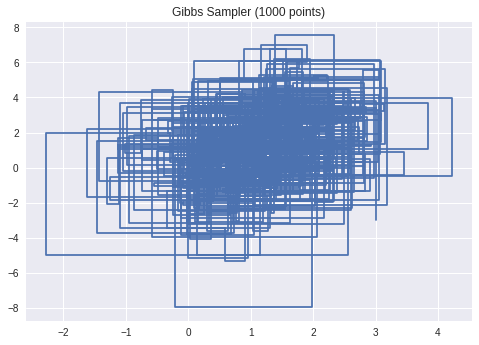

In [6]:
# Import
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
from matplotlib import cm

def gauss(x,y,Sigma,mu):
    X=np.vstack((x,y)).T
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(Sigma)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))

# Gaussian
def plot_countour(x,y,z):
    # define grid.
    xi = np.linspace(-2.1, 2.1, 100)
    yi = np.linspace(-2.1, 2.1, 100)
    ## grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    levels = [0.6, 0.8, 1.0]
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,len(levels),linewidths=0.5,colors='k', levels=levels)
    #CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    CS = plt.contourf(xi,yi,zi,len(levels),cmap=cm.Greys_r, levels=levels)
    plt.colorbar() # draw colorbar
    # plot data points.
    # plt.scatter(x, y, marker='o', c='b', s=5)
    plt.xlim(-2, 4)
    plt.ylim(-2, 4)
    plt.title('Gaussian (%d points)' % npts)
    plt.show()


# make up some randomly distributed data
seed(1234)
npts = 1000
x = uniform(-2, 2, npts)
y = uniform(-2, 2, npts)
z = gauss(x, y, Sigma=np.asarray([[1.,1.],[1.,5.]]), mu=np.asarray([1.,1.]))
#z = gauss(x, y, Sigma=np.asarray([[1.,1.],[1.,5.]]), mu=np.asarray([1.,1.]))
plot_countour(x, y, z)

# Gibbs Sampler
samples = gibbs_sample(univariate_conditionals, sample_count=npts)

# Plot Gibbs Sampler in Contour
fig = plt.figure()
plt.plot(samples[0,:], 
        samples[1,:])
plt.title('Gibbs Sampler (%d points)' % npts)
plt.show()

## (c) Implement Gibbs Sampler (before and after burn-in)

Implement Gibbs sampler for distribution in part (b) above, with $\theta_1 = \dots = \theta_6 = \frac{1}{3}$. Compare before and after burn-in.

In [0]:
def get_conditional_dist(joint_mu, joint_cov, var_index):
    '''Returns the conditional distribution given the joint distribution and which variable
    the conditional probability should use.
    Right now this only works for 2-variable joint distributions.
    
      joint_mu: joint distribution's mu
      joint_cov: joint distribution's covariance
      var_index: index of the variable in the joint distribution. Everything else will be 
        conditioned on. For example, if the joint distribution p(a, b, c) has mu [mu_a, mu_b, mu_c],
        to get p(c | a, b), use var_index = 2.
      
    returns:
      a function that can sample from the univariate conditional distribution
    '''
    assert joint_mu.shape[0] == 2, 'Only works for 2-dimensional joint distributions right now'
    a = joint_mu[var_index]
    b = joint_mu[~var_index]
    
    A = joint_cov[var_index, var_index]
    B = joint_cov[~var_index, ~var_index]
    C = joint_cov[var_index, ~var_index]
    
    # we're dealing with one dimension so
    B_inv = 1/B
    
    # Return a function that can sample given a value of g
    def dist(g):
        # a + C*B^{-1}(g - b)
        mu = a + C * B_inv * (g - b)
        # A - C * B^{-1} * C^T
        cov = A - B_inv * C * C
        #return np.sqrt(cov)*np.random.randn(1) + mu
        return 1 + np.exp(0.333333*np.sqrt(cov)*np.random.randn(1) + 0.333333*mu)
    
    return dist

In [0]:
# Set up the conditional probability distribution for each dimension

sigmoid_conditionals = [
    #1 + np.exp((1/3), np.array(get_conditional_dist(joint_mu, joint_cov, d)))
    get_conditional_dist(joint_mu, joint_cov, d)
    for d in range(D)
]

In [0]:
# Implement the Gibbs sampling algorithm
def gibbs_sample(sigmoid_conditionals, sample_count):
    '''Does Gibbs sampling given the distribution's univariate conditionals.
    
    Returns a D x N matrix
    '''
    D = len(sigmoid_conditionals)
    assert D == 2, "Sorry, this only supports 2 dimensions right now"
    
    # initializes an empty matrix for the samples
    samples = np.zeros((D, sample_count))

    # initialize the first sample to some arbitrary value
    samples[:, 0] = [3, -3]
    
    for i in range(1, sample_count):
        # first set this sample equal to the previous sample
        #i = 1
        samples[:, i] = samples[:, i - 1]
        
        # now update the dimension whose turn it is using the conditional distribution
        # pass in all dimension from the previous sample except this dimension
        d = i % D
        samples[d, i] = sigmoid_conditionals[d](samples[~d, i - 1])
        #i = i + 1
        #samples, i
                 
    return samples


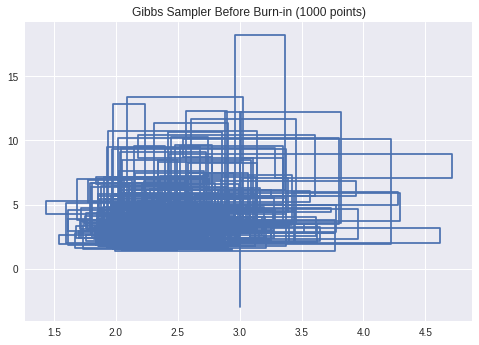

In [173]:
# Gibbs Sampler
npts = 1000
samples = gibbs_sample(sigmoid_conditionals, sample_count=npts)
#samples = np.array(samples.T[200:, ]).T
#samples.shape # Check the size

# Plot Gibbs Sampler in Contour
fig = plt.figure()
plt.plot(samples[0,:], 
        samples[1,:])
plt.title('Gibbs Sampler Before Burn-in (%d points)' % npts)
plt.show()

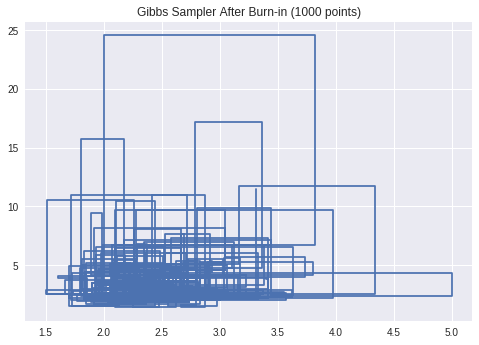

In [174]:
# Gibbs Sampler
npts = 1000
samples = gibbs_sample(sigmoid_conditionals, sample_count=npts)
samples = np.array(samples.T[500:, ]).T
#samples.shape # Check the size

# Plot Gibbs Sampler in Contour
fig = plt.figure()
plt.plot(samples[0,:], 
        samples[1,:])
plt.title('Gibbs Sampler After Burn-in (%d points)' % npts)
plt.show()

From the above python implementation, we have done the following:

- We update our Gibbs Sampler using Exponential conditional according to 2b.
- Then we plot the path before and after burn-in (assuming using drop the first 500 nodes). 

We compare the plot and we observe that the initial values are dropped and the plot after burn-in is a lot more smoother on the area. If we were to initiate from a different spot, we would have observed the same result.